# TP4 IAA -- M1 Informatique¶

# RIAZI Ibrahim 

In [53]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##  1. Visualisation d’Adaboost avec X = R²

### 1.1 Questions basiques, pour la comprehension 

#### 1 

#### 2 

#### 3 

In [54]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 31 09:11:31 2020

@author: Cecile Capponi
ONLY BINARY CLASSIFICATION IS CONCERNED, WITHIN REAL 2D INPUT SPACE
WEAK LEARNERS MUST BE STUMPS
"""

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Surface of decision is a rectagle defined by learned stumps (at least 4)
# each rectangle will receive a color adapted to the class predicted for
# points in it.
class Rectangle:
    def __init__(self, xmin, xmax, ymin, ymax): #limits of the rectangle 
        self.ptopleft_ = (xmin,ymin)
        self.ptopright_ = (xmax, ymin)
        self.pbotleft_ = (xmin, ymax)
        self.pbotright_ = (xmax, ymax)
        self.center_ = np.array([(xmax+xmin)/2, (ymax+ymin)/2])
        
    def __str__(self):
        return str(self.center_)+' -- '+str(self.class_)
        
    
    def set_class(self, c):
        self.class_ = c
        
    def tox(self):
        return [self.ptopleft_[0], self.pbotleft_[0], 
                self.pbotright_[0], self.ptopright_[0]]
        
    def toy(self):
        return [self.ptopleft_[1], self.pbotleft_[1], 
                self.pbotright_[1], self.ptopright_[1]]
        
# if considering the stump learned at iteration t of classifier clf, 
# this function returns on which component (0 or 1) the test was made
# and what is the threshold on that component
def getStump(clf, t):
    # to be implemented
    i_feature = clf.estimators_[t].tree_.feature[0]
    threshold = clf.estimators_[t].tree_.threshold[0]
    return (i_feature, threshold)
    
# Generates the rectangles of decisions
def generateZones(clf,limitsx, limitsy, T, process_all=1):
    # A list of two lists (thresholds on first then second component)
    TX =[] 
    TX.append([limitsx[0]])
    TX.append([limitsy[0]])
    # getting the weak separators given by stumps
    if process_all:
        for ite in range(T):
            stump = getStump(clf,ite)
            TX[stump[0]].append(stump[1])
    else:
        stump = getStump(clf,T)
        TX[stump[0]].append(stump[1])
    TX[0].append(limitsx[1])
    TX[1].append(limitsy[1])
    # sorting
    for i in [0,1]: 
        TX[i] = np.array(TX[i])
        TX[i].sort()
    # list of rectangles to be colored
    R = []
    for yt in range(TX[1].shape[0]-1):
        for xt in range(TX[0].shape[0]-1):
            r = Rectangle(TX[0][xt], TX[0][xt+1], TX[1][yt], TX[1][yt+1])
            R.append(r)
    return R

### 1.2 Visualisation d’AdaBoost : cas genéral

#### 1, 2 

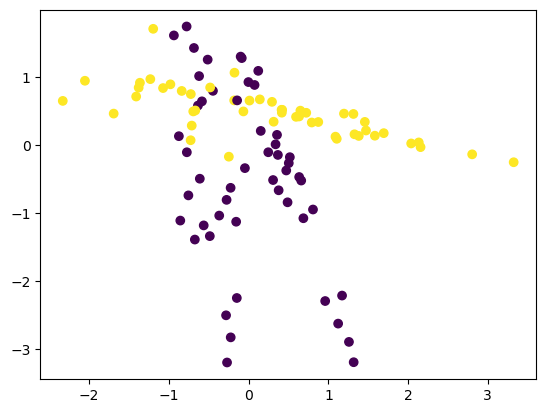

In [56]:
X,Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, class_sep=0.5, random_state=72)

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()


#### 3 

In [60]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
clf.fit(X, Y)
print("Score : ", accuracy_score(Y, clf.predict(X)))

Score :  1.0


#### 4 

Nb_iterations: 20, score_mean: 0.980000, score_std: 0.000000, time: 0.001401
Nb_iterations: 50, score_mean: 1.000000, score_std: 0.000000, time: 0.006361
Nb_iterations: 70, score_mean: 1.000000, score_std: 0.000000, time: 0.007984
Nb_iterations: 90, score_mean: 1.000000, score_std: 0.000000, time: 0.010978
Nb_iterations: 150, score_mean: 1.000000, score_std: 0.000000, time: 0.026411
Nb_iterations: 300, score_mean: 1.000000, score_std: 0.000000, time: 0.059276


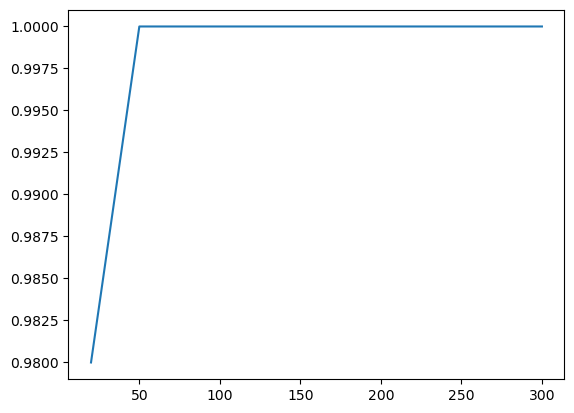

In [4]:
def estimation(X, Y, iterations):
    results = []
    for n in iterations:
        scores = []
        for j in range(10):
            start_time = time.time()
            clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n,  random_state=n+42)
            clf.fit(X, Y)
            end_time = time.time()
            scores.append(accuracy_score(Y, clf.predict(X)))
        print("Nb_iterations: %d, score_mean: %f, score_std: %f, time: %f" % (n, np.mean(scores), np.std(scores), (end_time - start_time)/10))
        results.append(np.mean(scores))
    plt.plot(iterations, results)
    plt.show()
estimation(X, Y, [20, 50, 70, 90, 150, 300])

#### 5

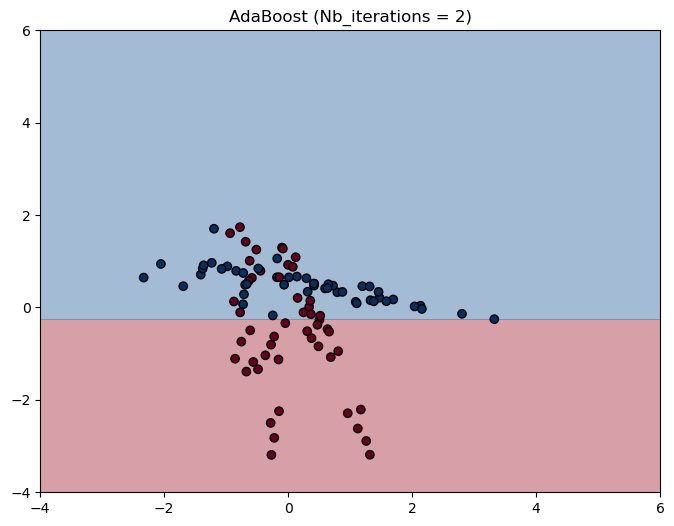

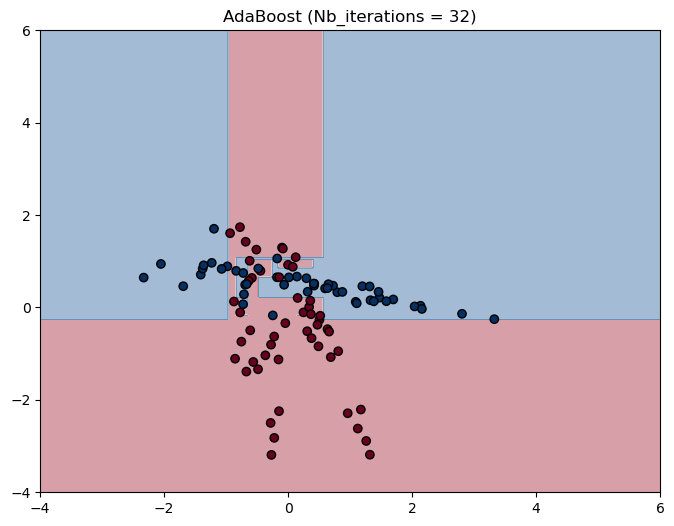

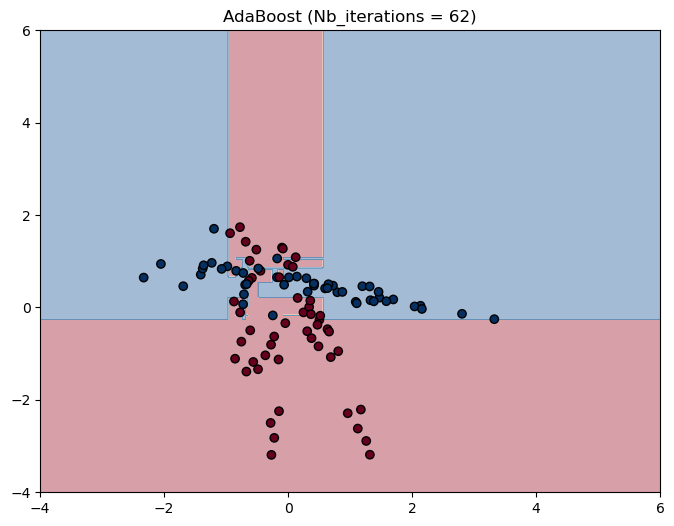

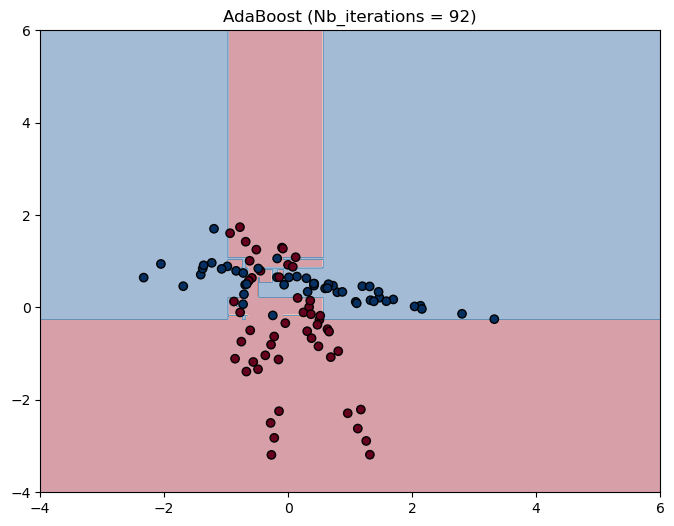

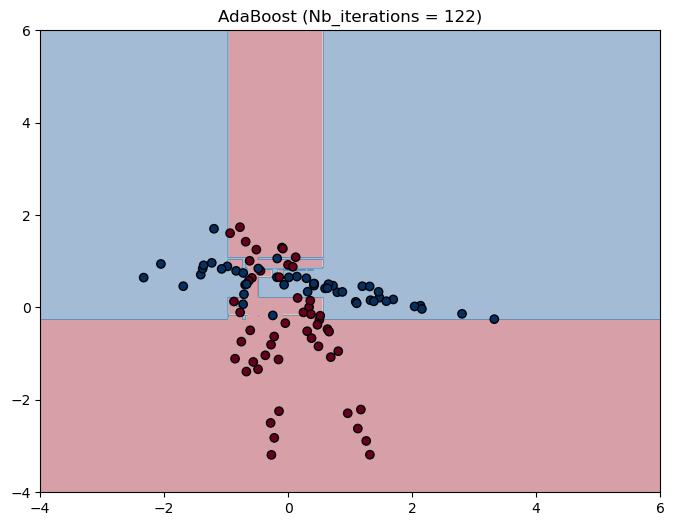

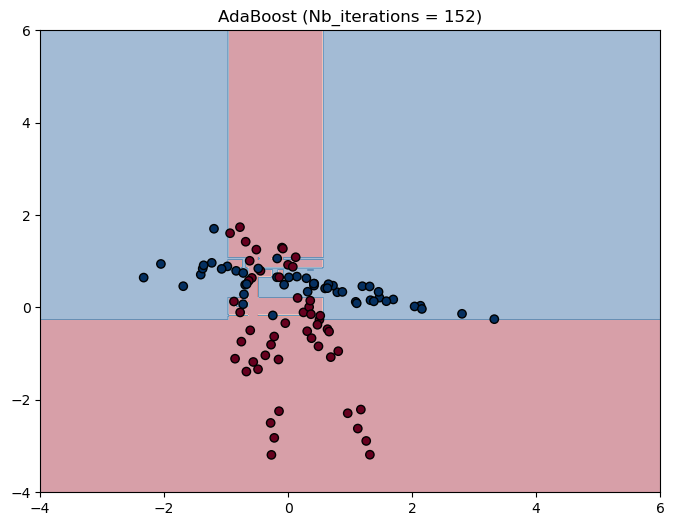

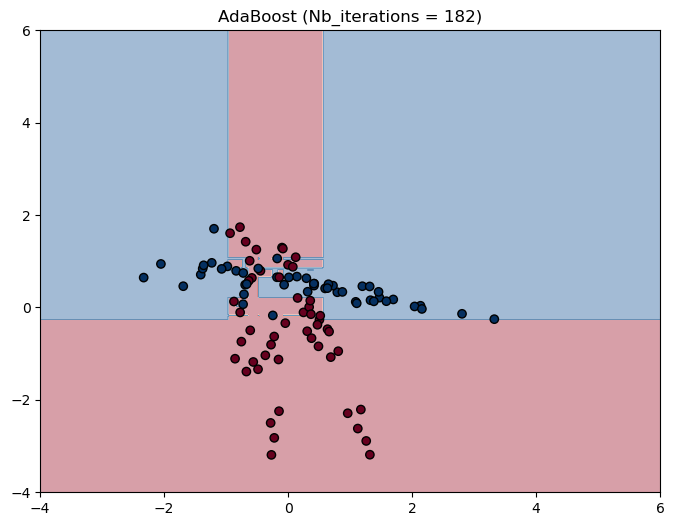

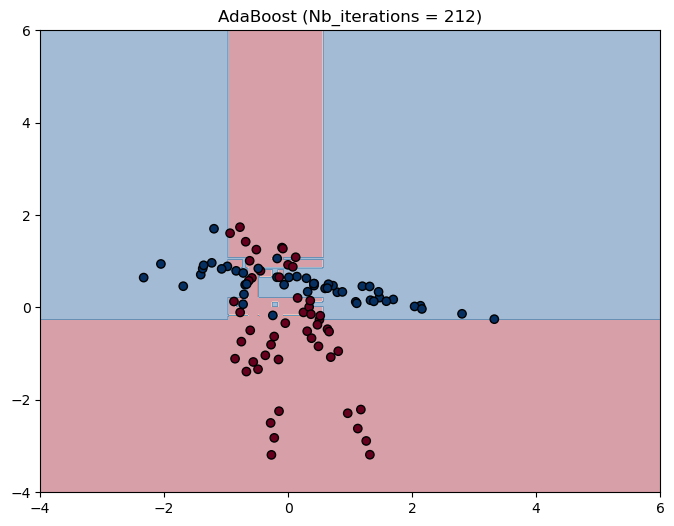

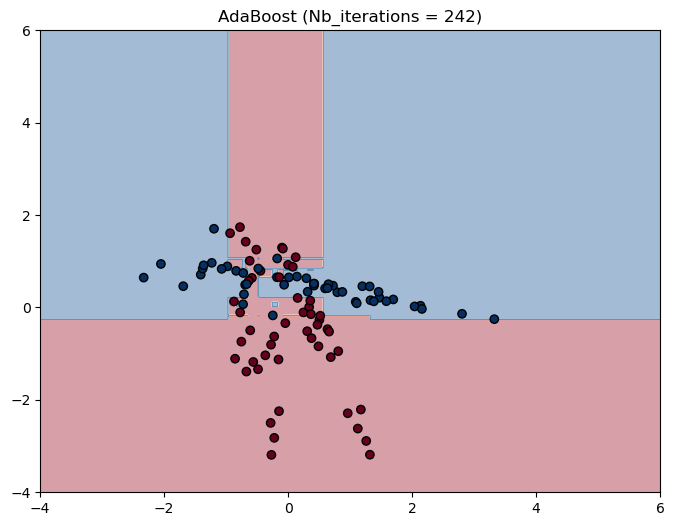

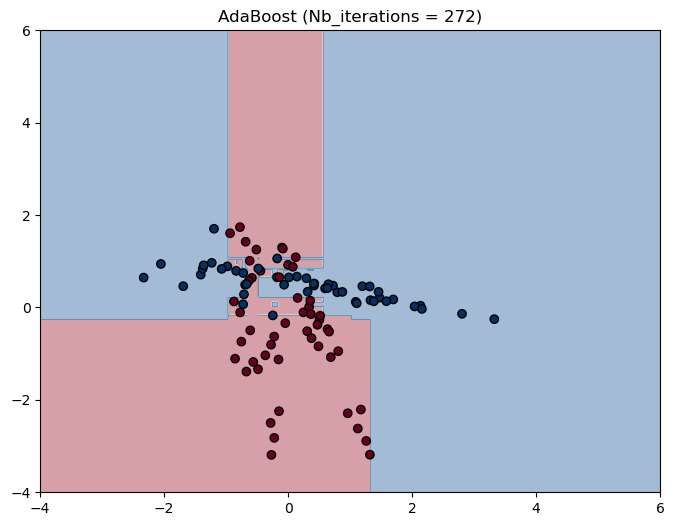

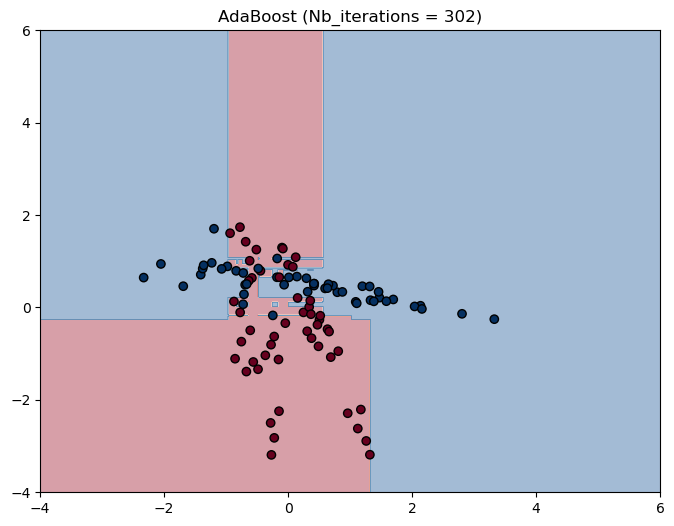

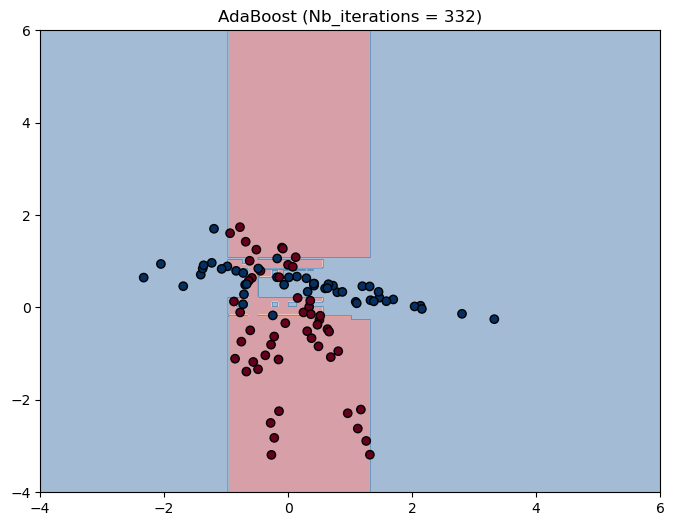

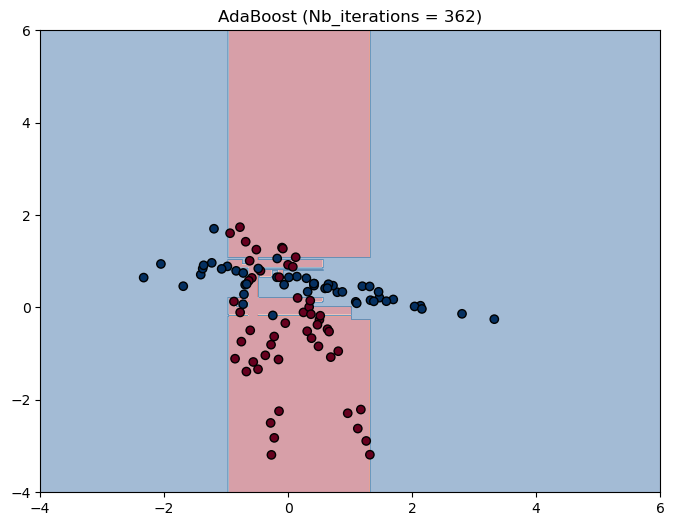

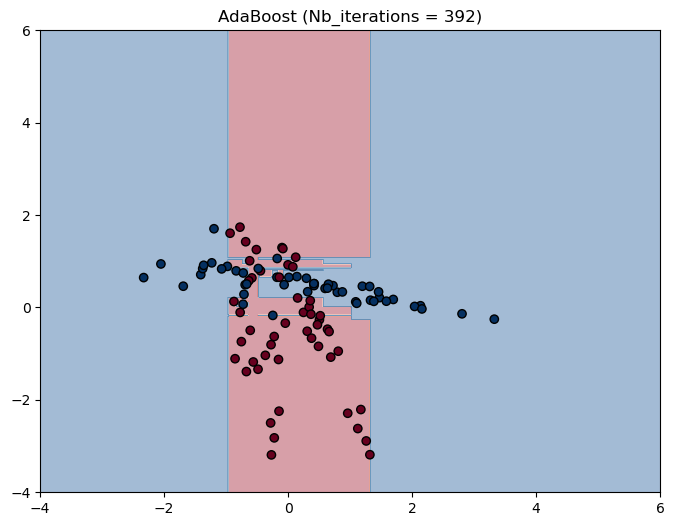

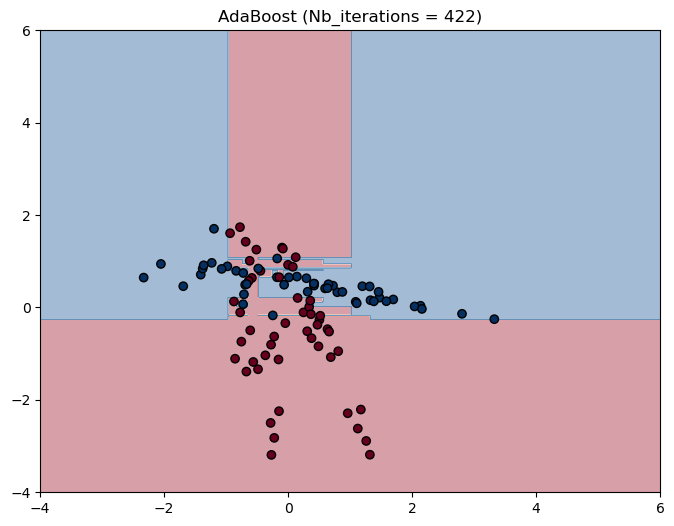

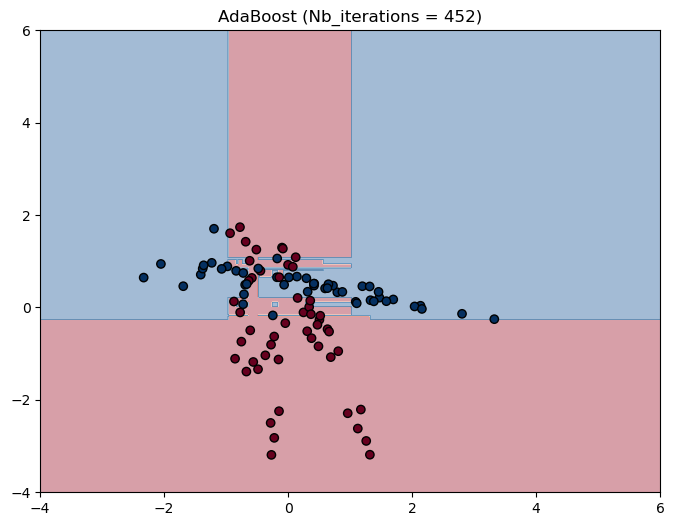

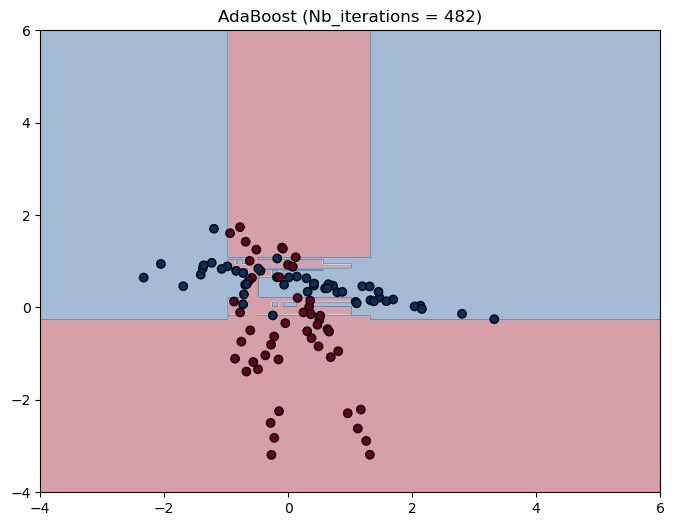

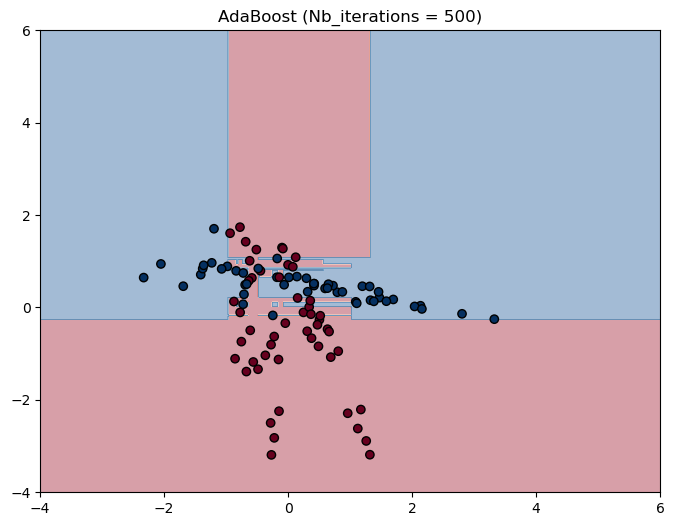

In [30]:
def plot_adaboost(X, Y, Nb_iterations):
    plt.figure(figsize=(8,6))
 
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=Nb_iterations)
    clf.fit(X, Y)
    
    xx, yy = np.meshgrid(np.linspace(-4, 6, 500), np.linspace(-4, 6, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.xlim([-4, 6])
    plt.ylim([-4, 6])
    plt.title('AdaBoost (Nb_iterations = {})'.format(Nb_iterations))
    plt.show()
def vriate_it_to_plot(X, Y, max_it, pas):
    n = 2
    while n <= max_it:
        plot_adaboost(X, Y, n)
        if n + pas > max_it and n < max_it: n += max_it - n
        else: n += pas
vriate_it_to_plot(X, Y, 500, 30)

### 1.3 Cas extremes d’AdaBoost 

In [62]:
# DATASET A
XHA = np.array([[1,1],[2,1],[1,2],[2,2], [3,3], [3,4], [4,3], [4,4],
               [1,3], [1,4], [2,3], [2,4], [3,1], [3,2], [4,1], [4,2]])
YHA = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

# DATASET B
XHB = np.array([[1,1],[2,1],[1,2],[2,2], [3,3], [3,4], [4,3], [4,4],
               [1,3], [1,4], [2,3], [2,4], [3,1], [3,2], [4,1], [4,2],[5,1]])
YHB = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1])

# DATAWET C
XHC = np.array([[1,1],[2,1],[1,2],[2,2], [3,3], [3,4], [4,3], [4,4],
               [1,3], [1,4], [2,3], [2,4], [3,1], [3,2], [4,1], [4,2],[5,1]])
YHC = np.array([0,0,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1])

#### 1

Nb_iterations: 20, score_mean: 0.500000, score_std: 0.000000, time: 0.003167
Nb_iterations: 50, score_mean: 0.500000, score_std: 0.000000, time: 0.009424
Nb_iterations: 70, score_mean: 0.500000, score_std: 0.000000, time: 0.013141
Nb_iterations: 90, score_mean: 0.500000, score_std: 0.000000, time: 0.016993
Nb_iterations: 150, score_mean: 0.500000, score_std: 0.000000, time: 0.028370
Nb_iterations: 300, score_mean: 0.500000, score_std: 0.000000, time: 0.052330


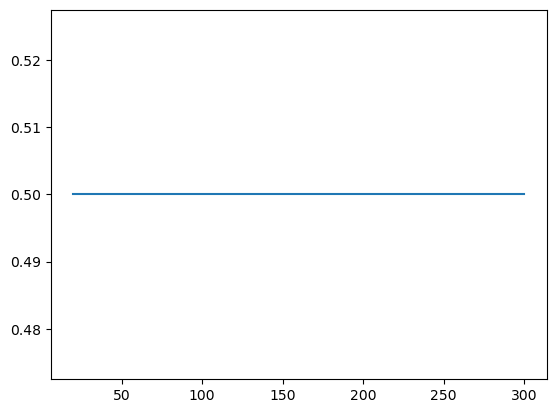

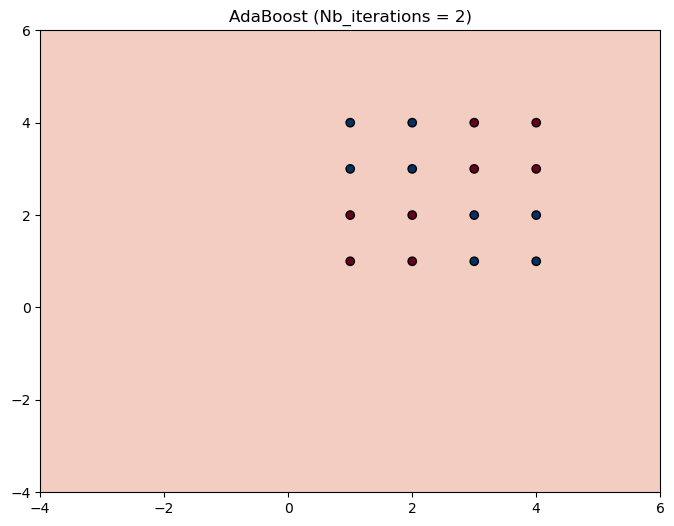

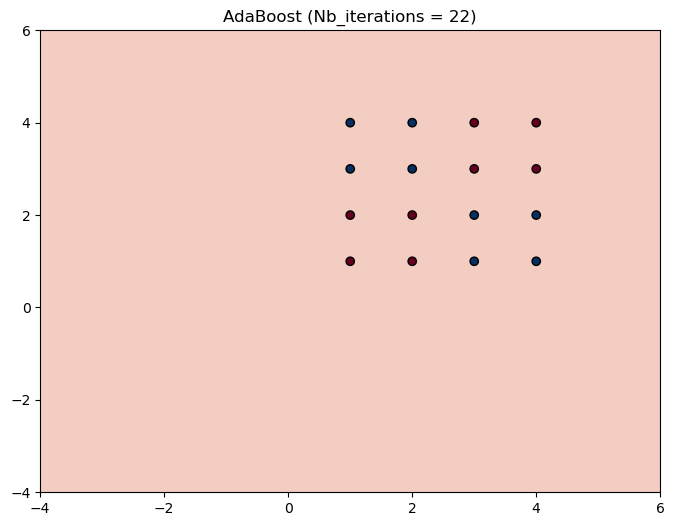

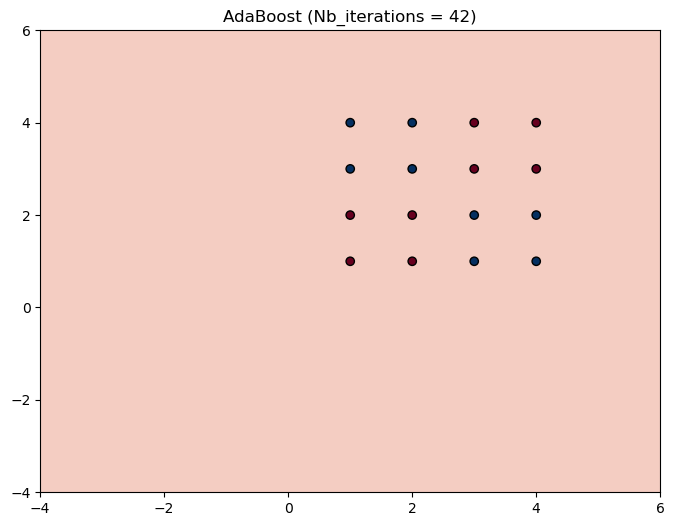

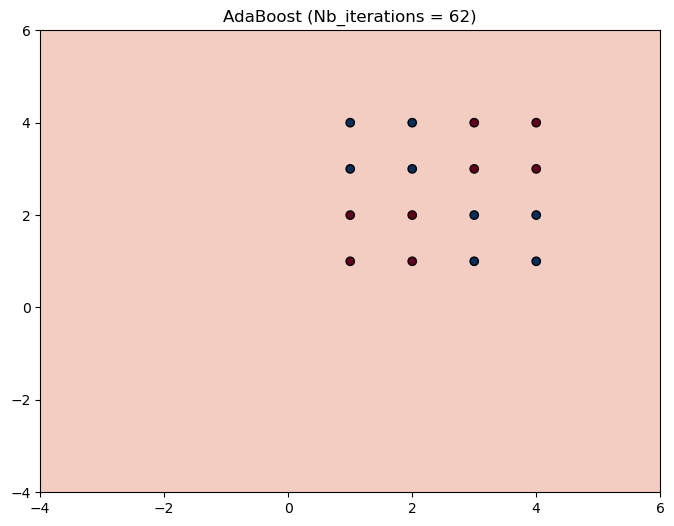

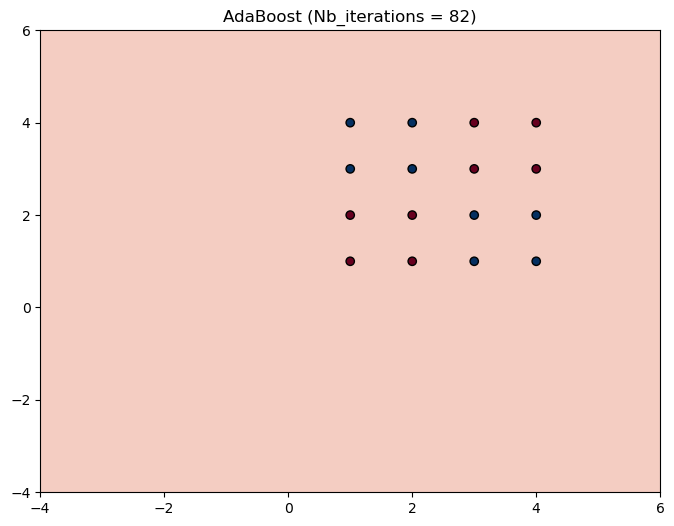

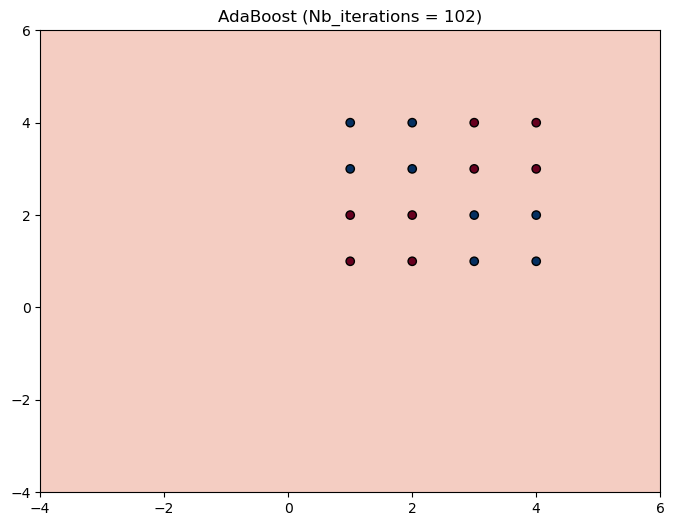

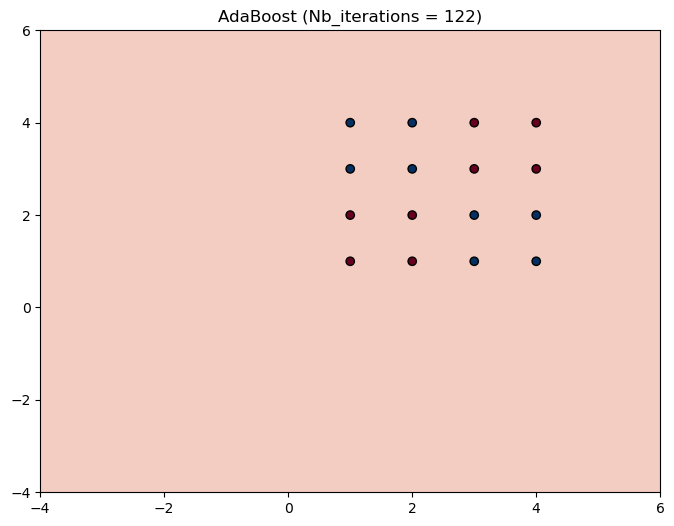

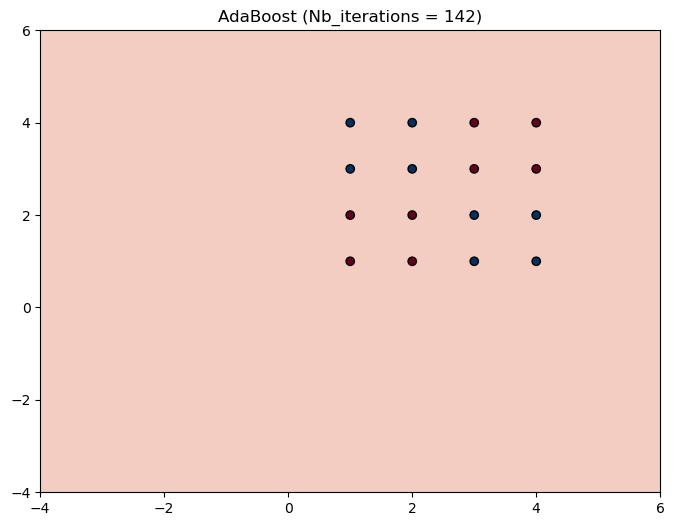

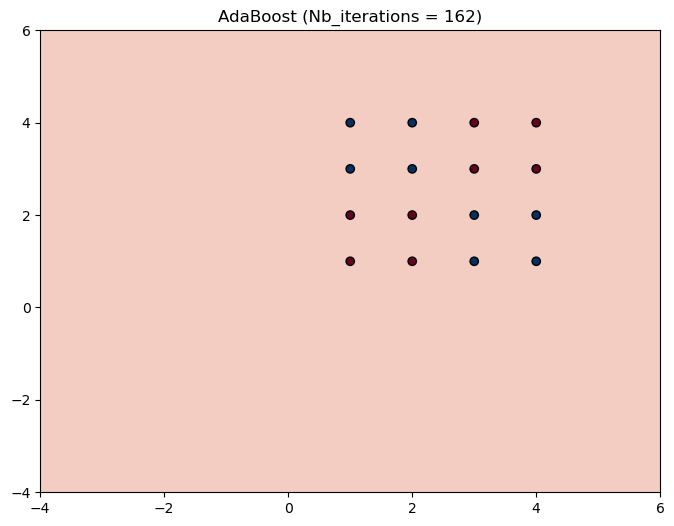

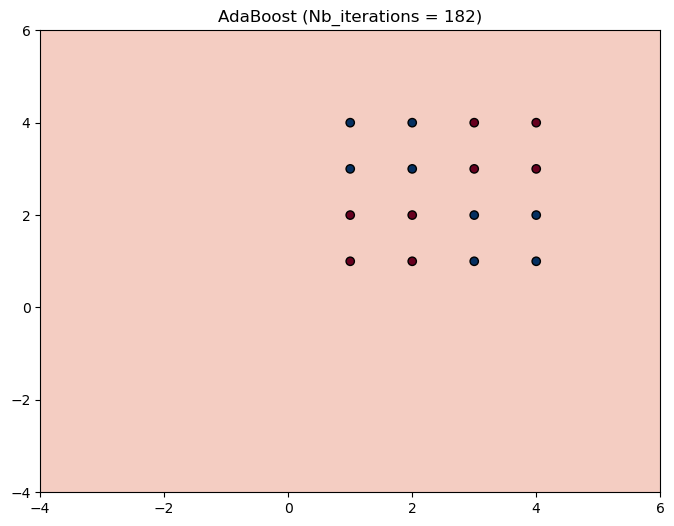

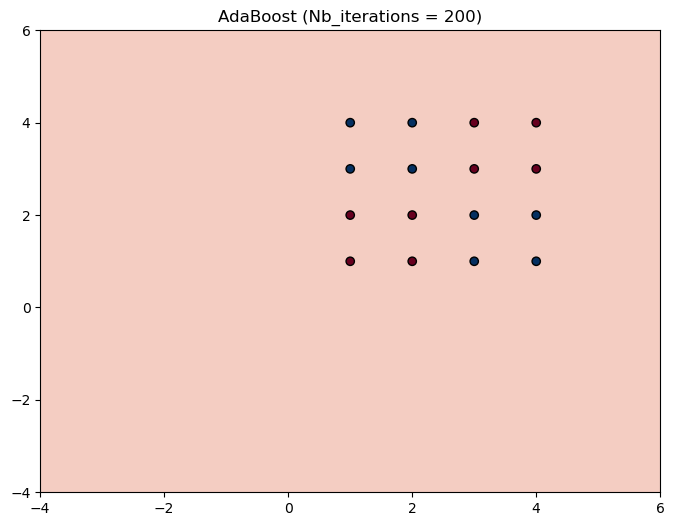

In [35]:
estimation(XHA, YHA, [20, 50, 70, 90, 150, 300])
vriate_it_to_plot(XHA, YHA, 200, 20)

Nb_iterations: 20, score_mean: 0.529412, score_std: 0.000000, time: 0.004004
Nb_iterations: 50, score_mean: 0.529412, score_std: 0.000000, time: 0.009374
Nb_iterations: 70, score_mean: 0.529412, score_std: 0.000000, time: 0.012924
Nb_iterations: 90, score_mean: 0.529412, score_std: 0.000000, time: 0.017226
Nb_iterations: 150, score_mean: 0.529412, score_std: 0.000000, time: 0.028263
Nb_iterations: 300, score_mean: 0.529412, score_std: 0.000000, time: 0.051777


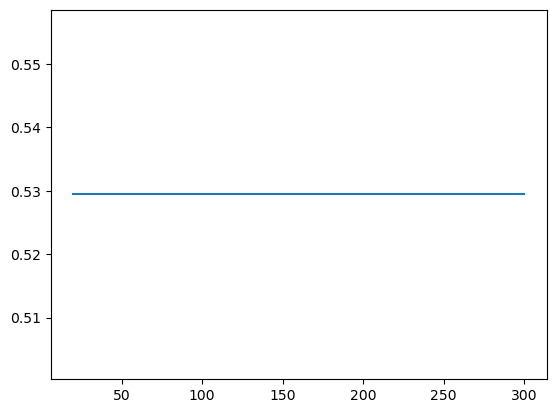

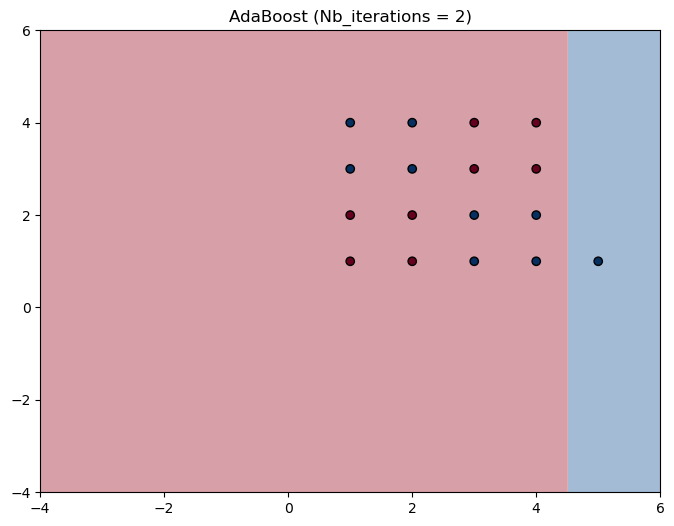

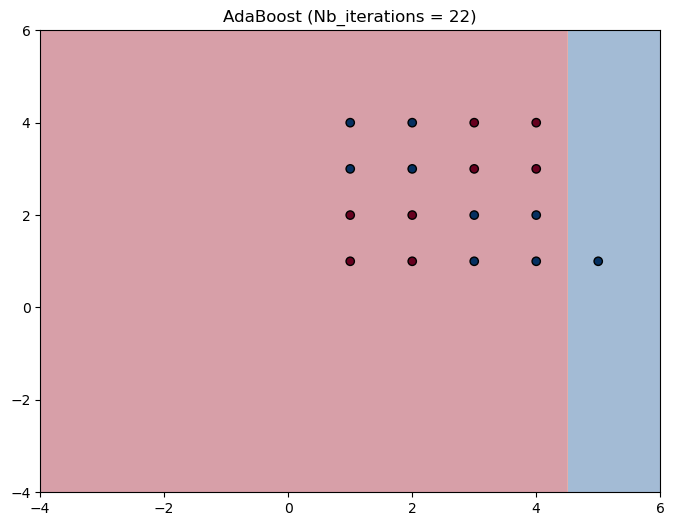

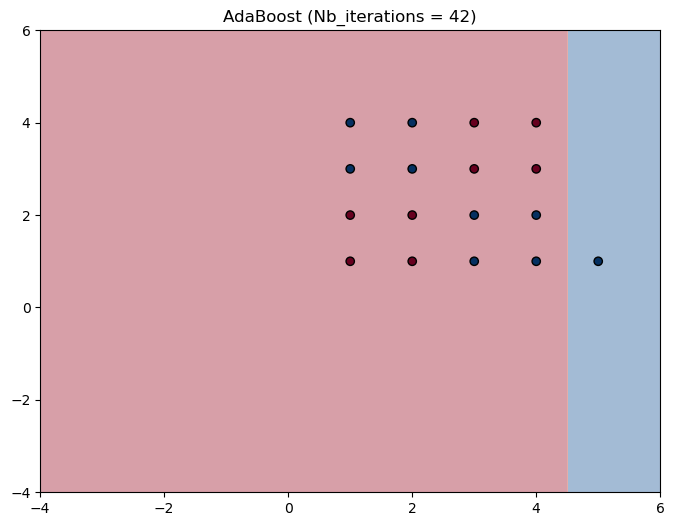

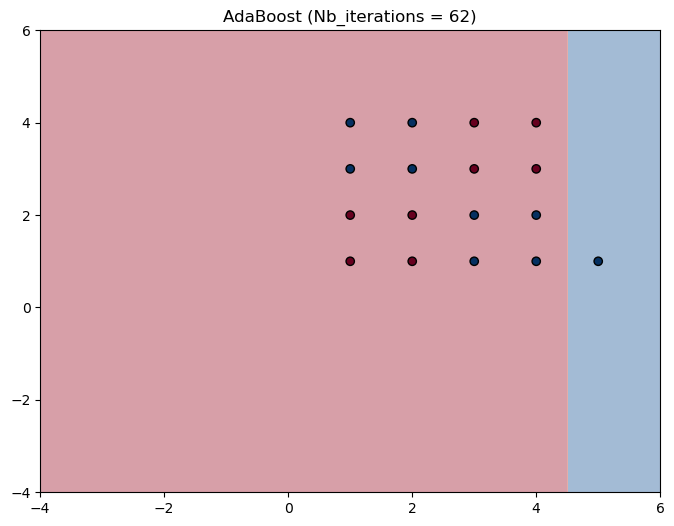

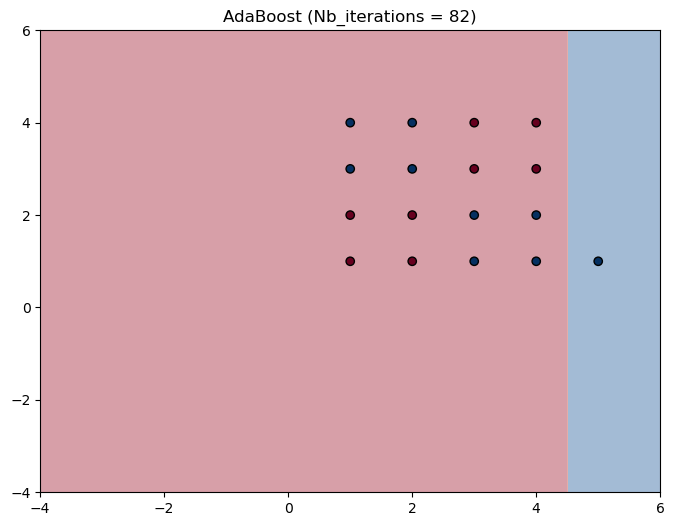

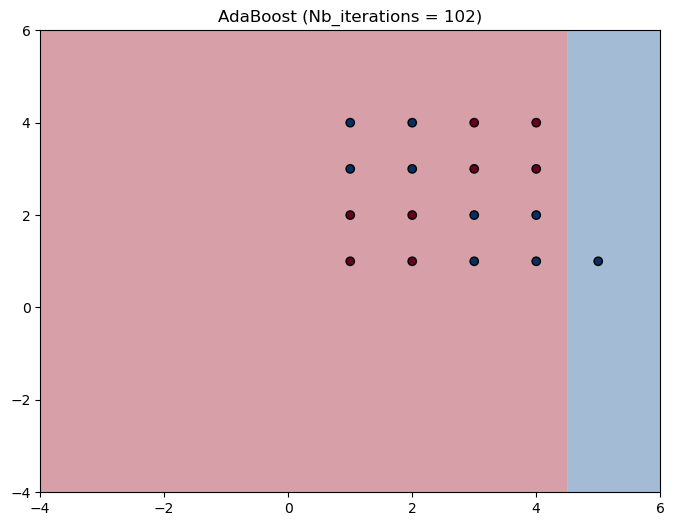

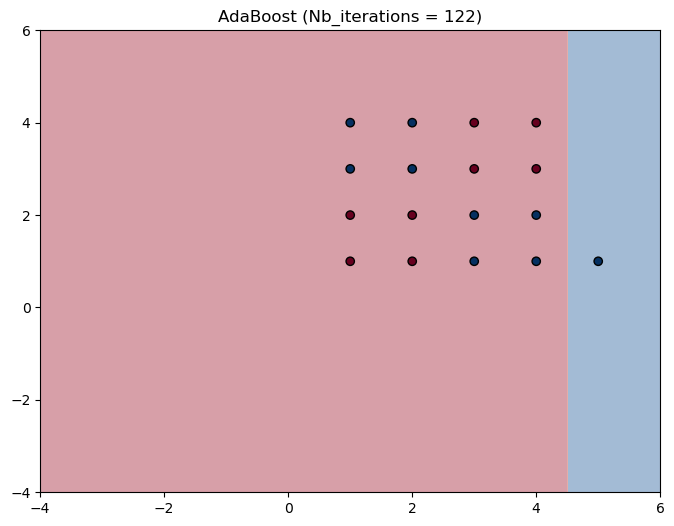

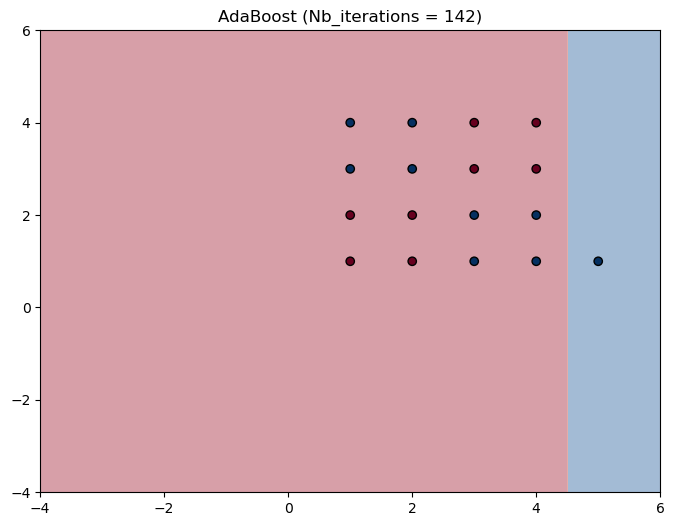

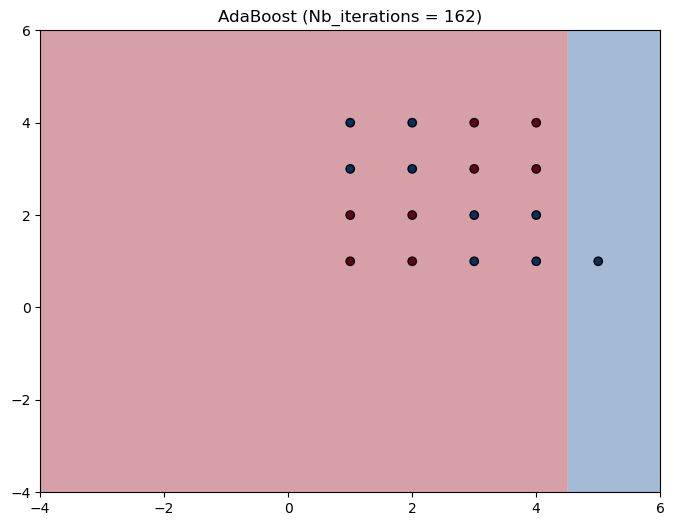

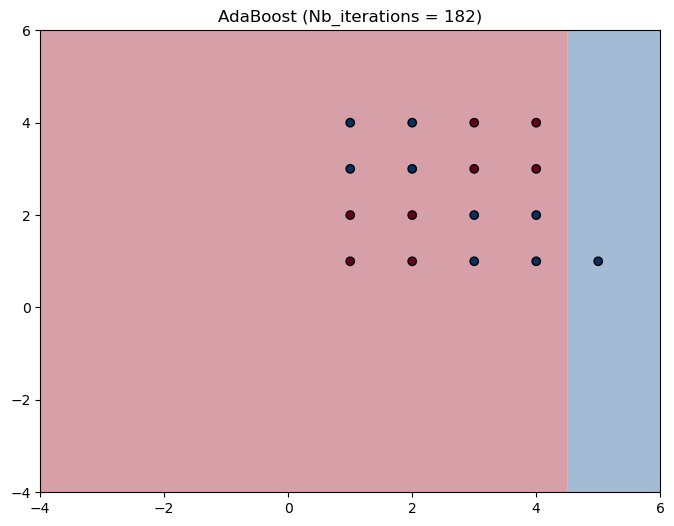

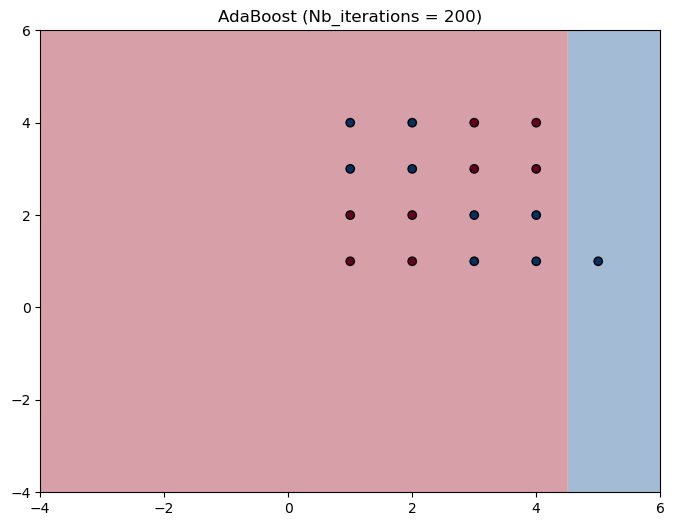

In [36]:
estimation(XHB, YHB, [20, 50, 70, 90, 150, 300])
vriate_it_to_plot(XHB, YHB, 200, 20)

Nb_iterations: 20, score_mean: 0.529412, score_std: 0.000000, time: 0.004939
Nb_iterations: 50, score_mean: 0.529412, score_std: 0.000000, time: 0.009801
Nb_iterations: 70, score_mean: 0.529412, score_std: 0.000000, time: 0.013753
Nb_iterations: 90, score_mean: 0.529412, score_std: 0.000000, time: 0.017365
Nb_iterations: 150, score_mean: 0.529412, score_std: 0.000000, time: 0.025800
Nb_iterations: 300, score_mean: 0.529412, score_std: 0.000000, time: 0.056501


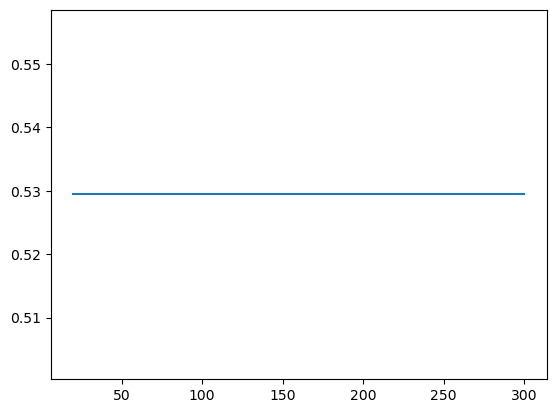

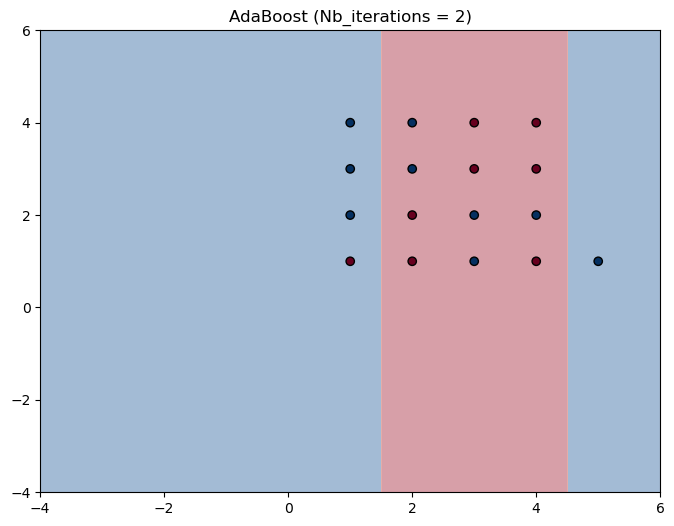

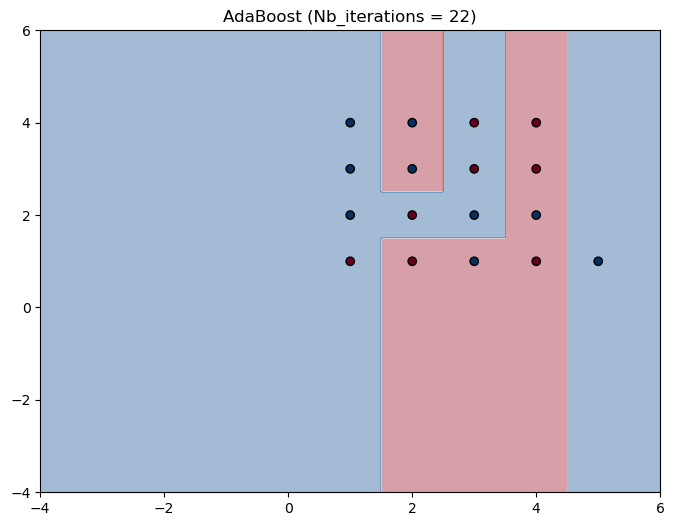

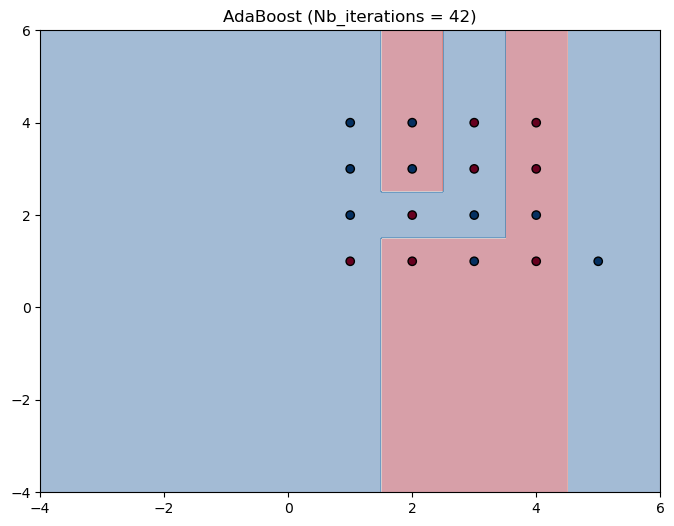

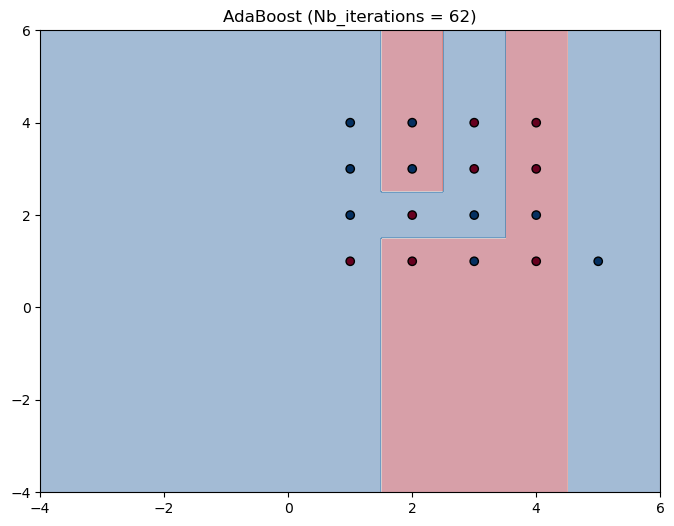

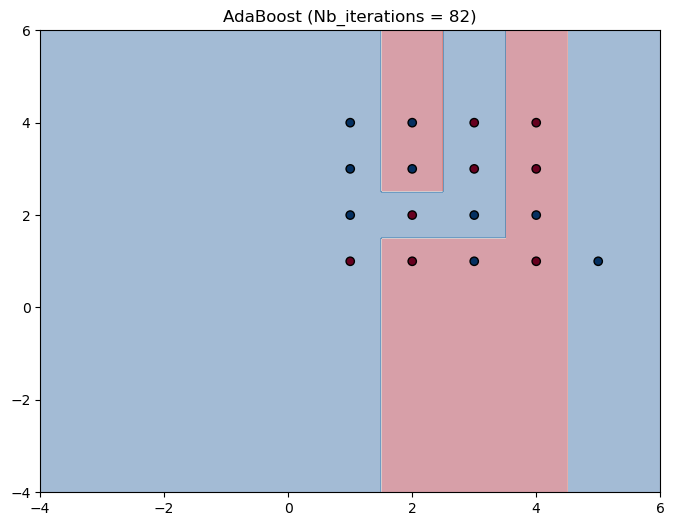

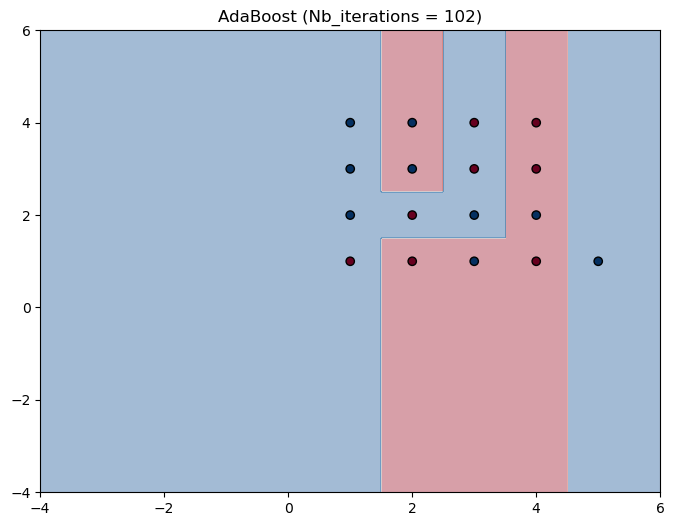

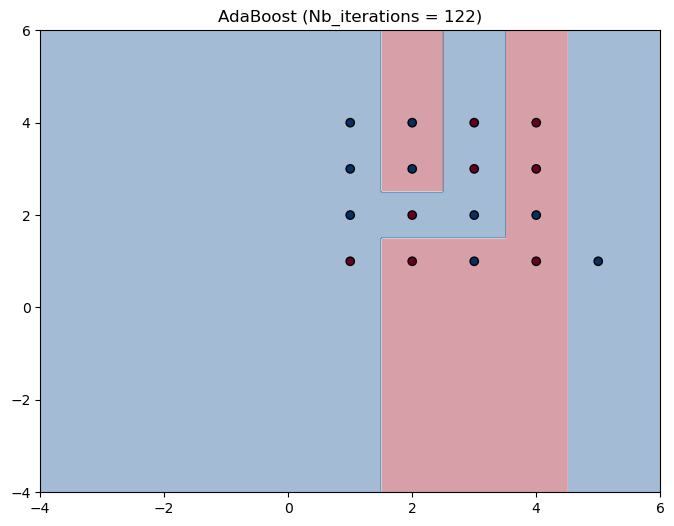

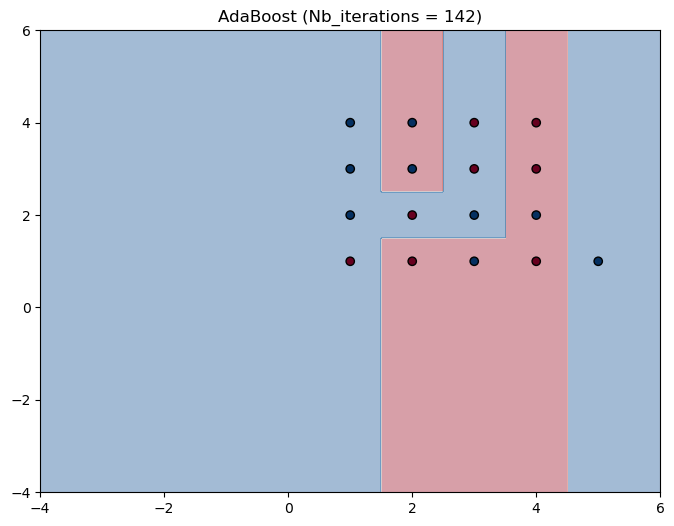

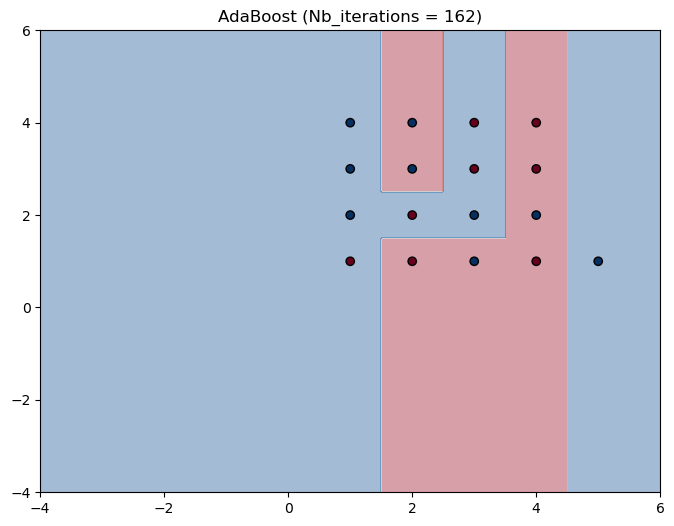

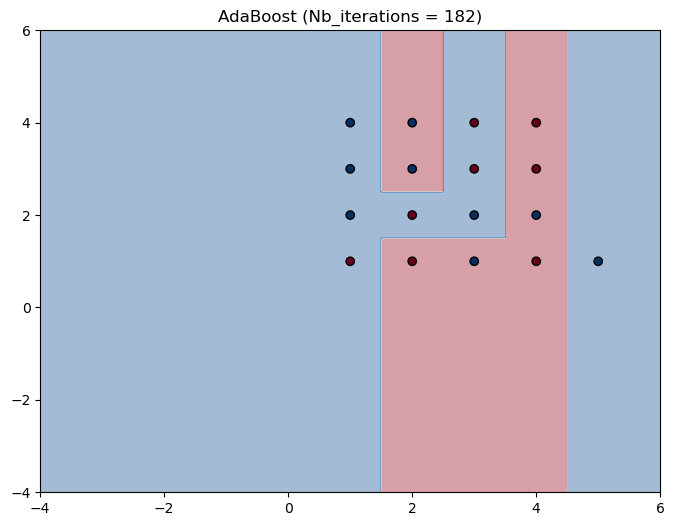

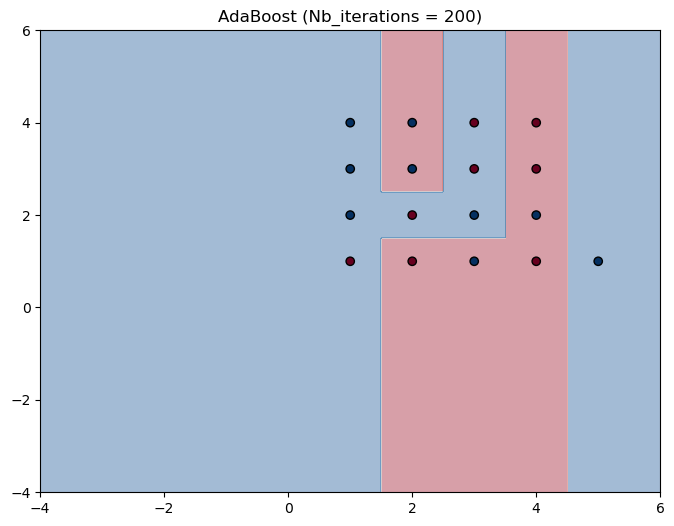

In [37]:
estimation(XHC, YHC, [20, 50, 70, 90, 150, 300])
vriate_it_to_plot(XHC, YHC, 200, 20)

#### 2 

#### 3 

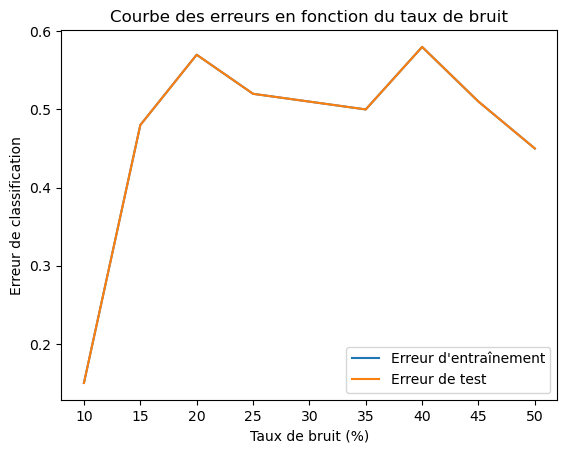

In [48]:
train_error = []
test_error = []
beta_range = range(10, 55, 5)
for beta in range(10, 55, 5):
    X_, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=1, flip_y=beta/100)
    
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
    clf.fit(X_, y)
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    train_scores = cross_val_score(clf, X, y, cv=cv)
    test_scores = cross_val_score(clf, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    train_error.append(1 - np.mean(train_scores))
    test_error.append(-1 * np.mean(test_scores))


plt.plot(beta_range, train_error, label='Erreur d\'entraînement')
plt.plot(beta_range, test_error, label='Erreur de test')
plt.xlabel('Taux de bruit (%)')
plt.ylabel('Erreur de classification')
plt.title('Courbe des erreurs en fonction du taux de bruit')
plt.legend()
plt.show()


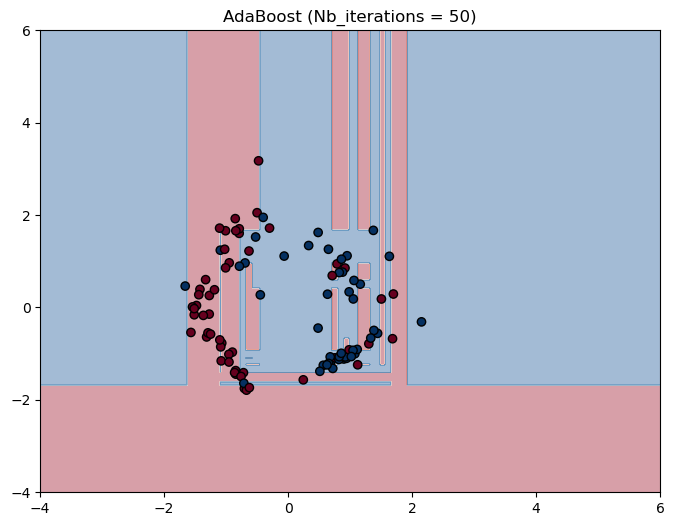

In [52]:
X_, y = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=1, flip_y=25/100)
plot_adaboost(X_, y, 50)



#### 4 